# Add info to scenarios

In this notebook, we add extra info to the scenarios:

- Total CO$_2$ emissions
- Cumulative net CDR (i.e. sum of emissions in years in which total CO$_2$ emissions are less than zero)
- Year of returning to 1.5
- Cumulative net CDR in year of returning to 1.5

Load in:
- extended emissions file
- extended magicc Temperature/ERF file

Output:
- extended magicc Temperature/ERF file with additional info

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import scmdata
import tqdm.autonotebook as tqdman

import utils

<IPython.core.display.Javascript object>

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_59109/3347364542.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
ID = "test"
SCENARIOS_min = [0, 6, 51, 101, 151, 201, 251, 301, 351]
SCENARIOS_max = [5, 50, 100, 150, 200, 250, 300, 350, 400]

<IPython.core.display.Javascript object>

In [4]:
OUTPUT_FILE = (
    utils.DATA_DIR
    / "interim"
    / "magicc-output"
    / f"magicc-output_{ID}_emission_info.csv"
)
OUTPUT_FILE.parent.parent.mkdir(exist_ok=True)
OUTPUT_FILE.parent.mkdir(exist_ok=True)

<IPython.core.display.Javascript object>

## Total CO$_2$ emissions

In [5]:
# load in as SCM to easily combine fossil and AFOLU
SOURCE_DATA = Path(
    utils.DATA_DIR
    / "interim"
    / "ar6-wg3-extended"
  #  / f"wg3-timeseries-extended_{ID}.csv"
    / f"wg3-timeseries-extended_zn_fullset.csv"
    
)

our_set = scmdata.ScmRun(str(SOURCE_DATA)).filter(
    variable=["*CO2*AFOLU*", "*CO2*Energy*"]
)

# Add total CO2
our_set_co2_total = our_set.filter(variable="*CO2*").process_over(
    "variable",
    "sum",
    op_cols={"variable": "AR6 climate diagnostics|Infilled|Emissions|CO2"},
    as_run=True,
    min_count=2,
)
our_set_co2_total.to_csv(
    Path(
        utils.DATA_DIR
        / "interim"
        / "ar6-wg3-extended"
        / f"wg3-timeseries-extended_{ID}_CO2_total.csv"
    )
)



<IPython.core.display.Javascript object>

In [6]:
datasets = []

for min_, max_ in tqdman.tqdm(zip(SCENARIOS_min, SCENARIOS_max)):
    DATA_FILE = Path(
        utils.DATA_DIR
        / "interim"
        / "magicc-output"
        / f"magicc-output_zn_fullset_{min_}_{max_}.csv"
    )
    datasets.append(scmdata.ScmRun(str(DATA_FILE)))

magicc_output = scmdata.run_append(datasets)
magicc_output["ms"] = magicc_output["model"] + magicc_output["scenario"]
magicc_output.head()

0it [00:00, ?it/s]

time                                                                                                                                                                                 1750-01-01 00:00:00  \
climate_model ensemble_member max_CDR       model       ms                                 region run_id scenario                total_CDR     unit  variable                                              
MAGICCv7.5.3  0               -13683.159952 AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  0      CD-LINKS_INDC2030i_1600 -4.910419e+06 K     Surface Air Temperature Change                  0.0   
                                                                                                                                               W/m^2 Effective Radiative Forcing                     0.0   
              1               -13683.159952 AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  1      CD-LINKS_INDC2030i_1600 -4.910419e+06 K     Surface Air Temperature Change                  0.0   
                                                                                                                                               W/m^2 Effective Radiative Forcing                     0.0   
              2               -13683.159952 AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  2      CD-LINKS_INDC2030i_1600 -4.910419e+06 K     Surface Air Temperature Change                  0.0   

time                                                                                                                                                                                 1751-01-01 00:00:00  \
climate_model ensemble_member max_CDR       model       ms                                 region run_id scenario                total_CDR     unit  variable                                              
MAGICCv7.5.3  0               -13683.159952 AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  0      CD-LINKS_INDC2030i_1600 -4.910419e+06 K     Surface Air Temperature Change             0.021043   
                                                                                                                                               W/m^2 Effective Radiative Forcing                0.100231   
              1               -13683.159952 AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  1      CD-LINKS_INDC2030i_1600 -4.910419e+06 K     Surface Air Temperature Change             0.025362   
                                                                                                                                               W/m^2 Effective Radiative Forcing                0.157746   
              2               -13683.159952 AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  2      CD-LINKS_INDC2030i_1600 -4.910419e+06 K     Surface Air Temperature Change             0.024834   

time                                                                                                                                                                                 1752-01-01 00:00:00  \
climate_model ensemble_member max_CDR       model       ms                                 region run_id scenario                total_CDR     unit  variable                                              
MAGICCv7.5.3  0               -13683.159952 AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  0      CD-LINKS_INDC2030i_1600 -4.910419e+06 K     Surface Air Temperature Change             0.030870   
                                                                                                                                               W/m^2 Effective Radiative Forcing                0.108626   
              1               -13683.159952 AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  1      CD-LINKS_INDC2030i_1600 -4.910419e+06 K     Surface Air Temperature Change             0.036492   
                                                                                                                          

<IPython.core.display.Javascript object>

In [7]:
start = our_set_co2_total.filter(
    variable="AR6 climate diagnostics|Infilled|Emissions|CO2"
)

total_net_cdr = scmdata.ScmRun(start.timeseries(time_axis="year").cumsum(axis=1))
total_net_cdr["variable"] = "Cumulative Net emissions|CO2"

total_net_cdr.head()

,,,,,,,time,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,2021-01-01 00:00:00,2022-01-01 00:00:00,2023-01-01 00:00:00,2024-01-01 00:00:00,...,2491-01-01 00:00:00,2492-01-01 00:00:00,2493-01-01 00:00:00,2494-01-01 00:00:00,2495-01-01 00:00:00,2496-01-01 00:00:00,2497-01-01 00:00:00,2498-01-01 00:00:00,2499-01-01 00:00:00,2500-01-01 00:00:00
max_CDR,model,ms,region,scenario,total_CDR,unit,variable,,,,,,,,,,,,,,,,,,,,,
-22975.485840,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_NDC2030i_1000,World,CD-LINKS_NDC2030i_1000,-8.662716e+06,Mt CO2/yr,Cumulative Net emissions|CO2,39152.7263,78845.544965,119077.038855,159845.790832,201150.383754,242989.400483,284539.14140,325799.889006,366771.925803,407455.534290,...,-7.374519e+06,-7.397494e+06,-7.420470e+06,-7.443445e+06,-7.466421e+06,-7.489396e+06,-7.512371e+06,-7.535347e+06,-7.558322e+06,-7.581298e+06
-13774.970781,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,World,CD-LINKS_INDC2030i_1600,-5.220670e+06,Mt CO2/yr,Cumulative Net emissions|CO2,39152.7263,78845.544965,119077.038855,159845.790832,201150.383754,242989.400483,284539.14140,325799.889006,366771.925803,407455.534290,...,-3.399028e+06,-3.412803e+06,-3.426578e+06,-3.440353e+06,-3.454128e+06,-3.467903e+06,-3.481678e+06,-3.495453e+06,-3.509228e+06,-3.523003e+06
-24596.743309,AIM/CGE 2.2,AIM/CGE 2.2EN_INDCi2100,World,EN_INDCi2100,-8.800847e+06,Mt CO2/yr,Cumulative Net emissions|CO2,39152.7263,79052.536291,119699.157239,161092.316409,203231.741068,246117.158482,288991.08985,331853.511236,374704.398705,417543.728321,...,-5.790394e+06,-5.814991e+06,-5.839588e+06,-5.864184e+06,-5.888781e+06,-5.913378e+06,-5.937975e+06,-5.962571e+06,-5.987168e+06,-6.011765e+06
-20465.673745,AIM/CGE 2.2,AIM/CGE 2.2EN_INDCi2030_900f,World,EN_INDCi2030_900f,-7.334323e+06,Mt CO2/yr,Cumulative Net emissions|CO2,39152.7263,79052.536291,119699.157239,161092.316409,203231.741068,246117.158482,288991.08985,331853.511236,374704.398705,417543.728321,...,-5.795758e+06,-5.816224e+06,-5.836690e+06,-5.857155e+06,-5.877621e+06,-5.898087e+06,-5.918552e+06,-5.939018e+06,-5.959484e+06,-5.979949e+06
-18428.916838,AIM/CGE 2.2,AIM/CGE 2.2EN_INDCi2030_800f,World,EN_INDCi2030_800f,-6.919110e+06,Mt CO2/yr,Cumulative Net emissions|CO2,39152.7263,79052.536291,119699.157239,161092.316409,203231.741068,246117.158482,288991.08985,331853.511236,374704.398705,417543.728321,...,-5.468633e+06,-5.487062e+06,-5.505490e+06,-5.523919e+06,-5.542348e+06,-5.560777e+06,-5.579206e+06,-5.597635e+06,-5.616064e+06,-5.634493e+06


<IPython.core.display.Javascript object>

In [8]:
scenario = "WITCH 5.0EN_INDCi2030_2000_NDCp"

<IPython.core.display.Javascript object>

In [9]:
cum_em_filt = total_net_cdr.filter(ms=scenario).timeseries()

<IPython.core.display.Javascript object>

In [10]:
T_filt = magicc_output.filter(
    variable="Surface Air Temperature Change",
    ms=scenario,
    ensemble_member=list(range(0, 599 + 1)),
).timeseries()

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd

scmdata.ScmRun(cum_em_filt).to_csv(
    (utils.DATA_DIR / "interim" / "magicc-output" / f"test_cum_em_filt.csv")
)
em_filt = pd.read_csv(
    (utils.DATA_DIR / "interim" / "magicc-output" / f"test_cum_em_filt.csv")
)

<IPython.core.display.Javascript object>

In [12]:
emissions = em_filt.iloc[:, 8:].T

<IPython.core.display.Javascript object>

In [13]:
scmdata.ScmRun(T_filt).to_csv(
    (utils.DATA_DIR / "interim" / "magicc-output" / f"T_filt.csv")
)
T_filt_ = pd.read_csv((utils.DATA_DIR / "interim" / "magicc-output" / f"T_filt.csv"))

<IPython.core.display.Javascript object>

In [14]:
temperature = T_filt_.iloc[:, 276:].T

<IPython.core.display.Javascript object>

In [15]:
emissions.columns = ["emissions"]

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'WITCH 5.0EN_INDCi2030_2000_NDCp')

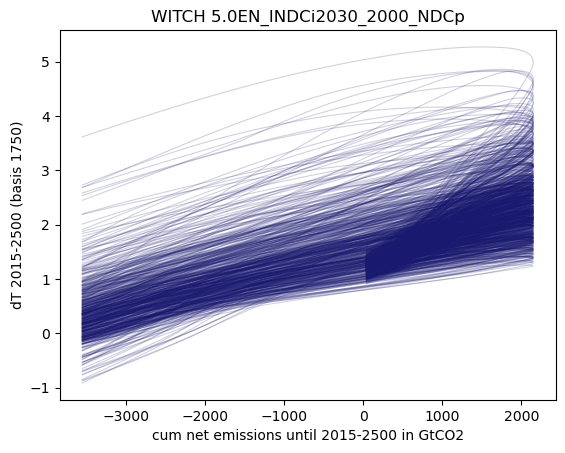

<IPython.core.display.Javascript object>

In [16]:
for num in list(range(0, 599 + 1)):
    # member = f"member{num}"
    plt.plot(
        emissions["emissions"] * 1e-3,
        temperature[num],
        color="midnightblue",
        alpha=0.2,
        lw=0.8,
    )  # , label=f"member{num}")
plt.xlabel("cum net emissions until 2015-2500 in GtCO2")
plt.ylabel("dT 2015-2500 (basis 1750)")
# plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.title(scenario)
# plt.xlim(0.5, 6)